In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


in this data the rows and columns which is combination of countinuous and one object one is target variableand other is independent variables
all columns to be float data type

In [3]:
df.shape

(7752, 25)

In [5]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')>

In [3]:
# thisdata the columnsstation whichis identity or nominal data therefore we remove this
df.drop('station',axis=1,inplace=True)

In [24]:
# checking the value counts in the columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

30-06-2013    25
18-07-2016    25
25-07-2016    25
24-07-2016    25
23-07-2016    25
              ..
09-08-2014    25
08-08-2014    25
07-08-2014    25
06-08-2014    25
30-08-2017    25
Name: Date, Length: 310, dtype: int64


31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: Present_Tmax, Length: 167, dtype: int64


24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.6      1
14.2      1
29.1      1
29.7      1
15.0      1
Name: Present_Tmin, Length: 155, dtype: int64


19.794666    2
71.658089    2
77.030350    2
98.524734    2
51.810596    2
            ..
52.924568    1
60.215191    1
46.799820    1
52.227486    1
22.933014    1
Name: LDAPS_RHmin, Length: 7672, dtype: int64


96.525200     2
99.251968     2
100.000153    2
91.878174     2
94.795967     2
             ..
96.718201     1
94.153252     1
96.910126     1
93.541885     1
77.243744     1
Name: LDAPS_RHmax, Lengt

In [4]:
#converting the datatype of date column from object to datetime
df['Date']= pd.to_datetime(df.Date,format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              7750 non-null   datetime64[ns]
 1   Present_Tmax      7682 non-null   float64       
 2   Present_Tmin      7682 non-null   float64       
 3   LDAPS_RHmin       7677 non-null   float64       
 4   LDAPS_RHmax       7677 non-null   float64       
 5   LDAPS_Tmax_lapse  7677 non-null   float64       
 6   LDAPS_Tmin_lapse  7677 non-null   float64       
 7   LDAPS_WS          7677 non-null   float64       
 8   LDAPS_LH          7677 non-null   float64       
 9   LDAPS_CC1         7677 non-null   float64       
 10  LDAPS_CC2         7677 non-null   float64       
 11  LDAPS_CC3         7677 non-null   float64       
 12  LDAPS_CC4         7677 non-null   float64       
 13  LDAPS_PPT1        7677 non-null   float64       
 14  LDAPS_PPT2        7677 n

In [5]:
#setting date as dataframe index
df.set_index('Date', inplace= True)
df.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [6]:
# checking the nulls value of dataset
df.isna().sum()

Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [7]:
# letsfill thenull values with the appropriate values by using fillna method

df['Present_Tmax'] = df['Present_Tmax'].fillna(df['Present_Tmax'].mean())
df['Present_Tmin'] = df['Present_Tmin'].fillna(df['Present_Tmin'].mean())
df['LDAPS_RHmin'] = df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean())
df['LDAPS_RHmax'] = df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mean())
df['LDAPS_Tmax_lapse'] = df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean())
df['LDAPS_Tmin_lapse'] = df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mean())
df['LDAPS_WS'] = df['LDAPS_WS'].fillna(df['LDAPS_WS'].mean())
df['LDAPS_LH']= df['LDAPS_LH'].fillna(df['LDAPS_LH'].mean())
df['LDAPS_CC1']= df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mean())
df['LDAPS_CC2']= df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mean())
df['LDAPS_CC3']= df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mean())
df['LDAPS_CC4']= df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mean())
df['LDAPS_PPT1']= df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mean())
df['LDAPS_PPT2']= df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mean())
df['LDAPS_PPT3']= df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mean())
df['LDAPS_PPT4']= df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mean())

In [9]:
# there is negativevalue in one columns to change it to zero
df[df<0] = 0

In [10]:
# lets check statistic od dataset
df.describe()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.510118,0.368774,0.356080,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.556623,0.261185,0.256810,...,1.754258,1.156174,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,0.142328,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,0.315667,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,0.554963,...,0.024276,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


#description given below of this dataset

1)there is no null values present in any of the columns hence its look like perfect
2)the mean value of columns are well manner with proportion to median in some columns more differnce between max and 75% of dataset hence possibility to outlier present in these columns
3)we have also notice std deviation and meean and 25% percentile values which is well manner
4)the standard deviation of thedata islowerthan mean value hence its positive sign to our data is perfect for modeling

In [32]:
df.shape

(7752, 23)

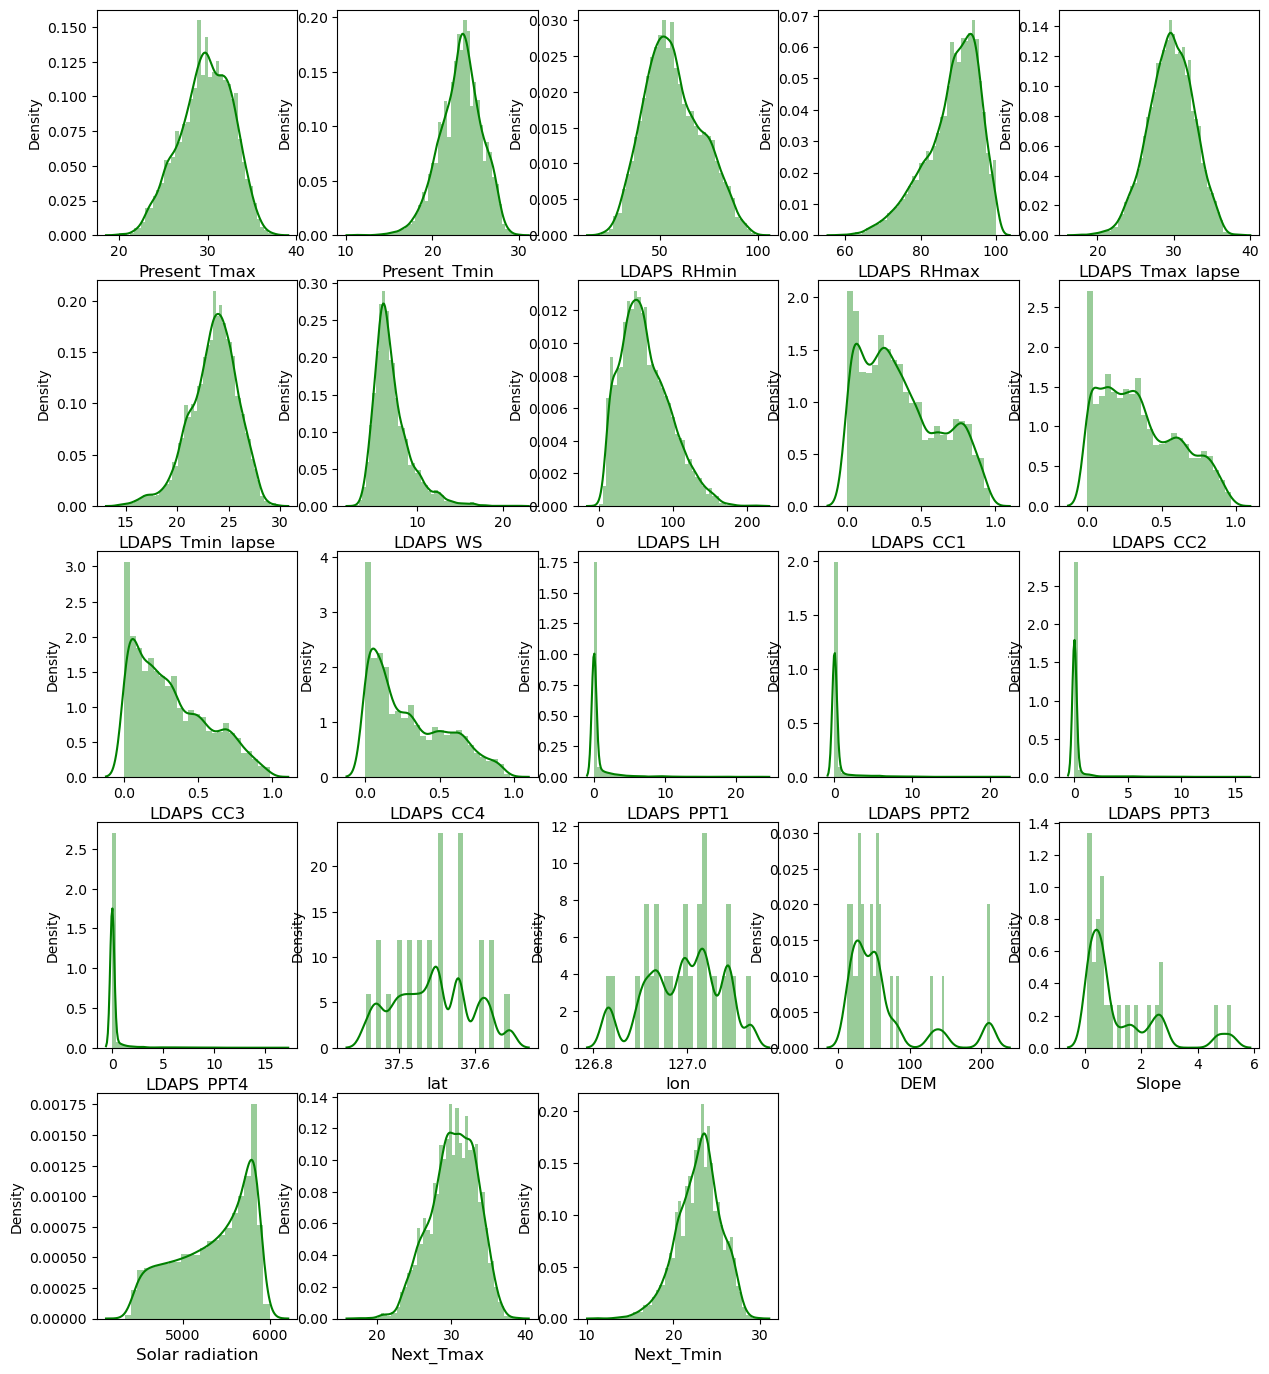

In [36]:
# checking the distribution through graph of data in each continuous coulmns
plt.figure(figsize=(15,17), facecolor='white')
plotnumber=1
for col in df:
    if plotnumber<=24:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df[col],color='g')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show()

In [11]:
# there are few more columns are skewed hence removing skewness of dataset
df.skew()

Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.675822
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
dtype: float64

In [12]:
#apply cube root method to remove skewness in volume
df['LDAPS_RHmax']= np.cbrt(df['LDAPS_RHmax'])
df['LDAPS_WS']= np.cbrt(df['LDAPS_WS'])
df['LDAPS_LH']= np.cbrt(df['LDAPS_LH'])
df['LDAPS_CC3']= np.cbrt(df['LDAPS_CC3'])
df['LDAPS_CC4']= np.cbrt(df['LDAPS_CC4'])
df['LDAPS_PPT1']= np.cbrt(df['LDAPS_PPT1'])
df['LDAPS_PPT2']= np.cbrt(df['LDAPS_PPT2'])
df['LDAPS_PPT3']= np.cbrt(df['LDAPS_PPT3'])
df['LDAPS_PPT4']= np.cbrt(df['LDAPS_PPT4'])
df['DEM']= np.cbrt(df['DEM'])
df['Slope']= np.cbrt(df['Slope'])

In [13]:
#again checking skewness
df.skew()

Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -1.003054
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            0.884657
LDAPS_LH           -0.240956
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3          -0.570388
LDAPS_CC4          -0.466712
LDAPS_PPT1          1.922841
LDAPS_PPT2          2.223126
LDAPS_PPT3          2.523911
LDAPS_PPT4          2.792122
lat                 0.087062
lon                -0.285213
DEM                 0.919779
Slope               0.614110
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
dtype: float64

In [ ]:
bound method IndexOpsMixin.tolist of Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')>

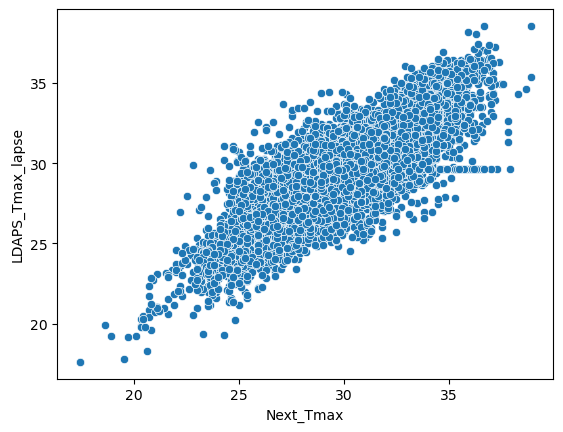

In [40]:
#let check visualization of our data
sns.scatterplot(x='Next_Tmax',y='LDAPS_Tmax_lapse',data=df)
plt.show()

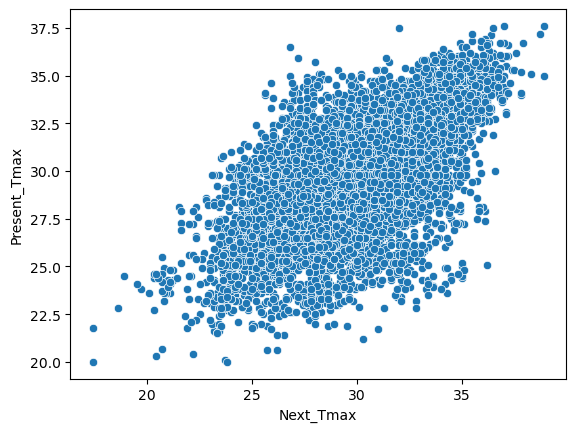

In [41]:
sns.scatterplot(x='Next_Tmax',y='Present_Tmax',data=df)
plt.show()

we show that one variable positively proposional totargetvariable hence all features contributing to target

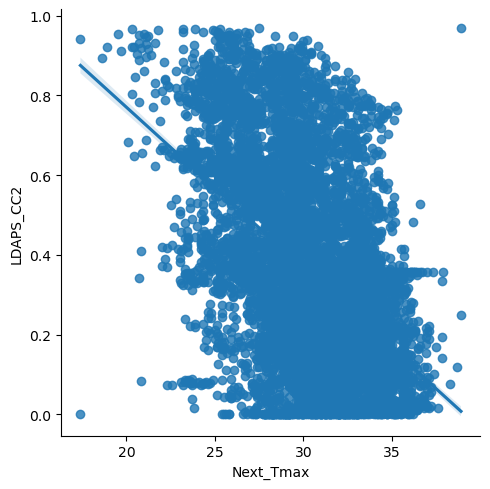

In [43]:
sns.lmplot(x='Next_Tmax',y='LDAPS_CC2',data=df)
plt.show()

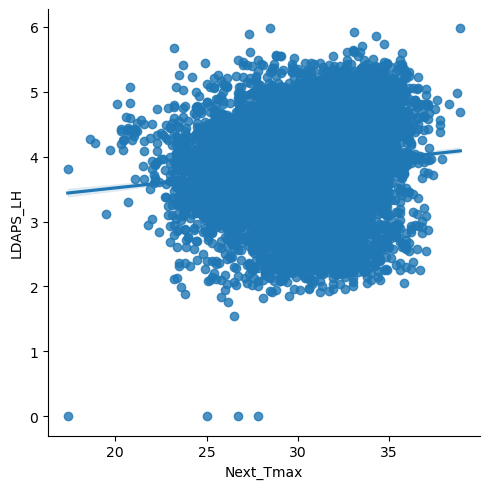

In [44]:
sns.lmplot(x='Next_Tmax',y='LDAPS_LH',data=df)

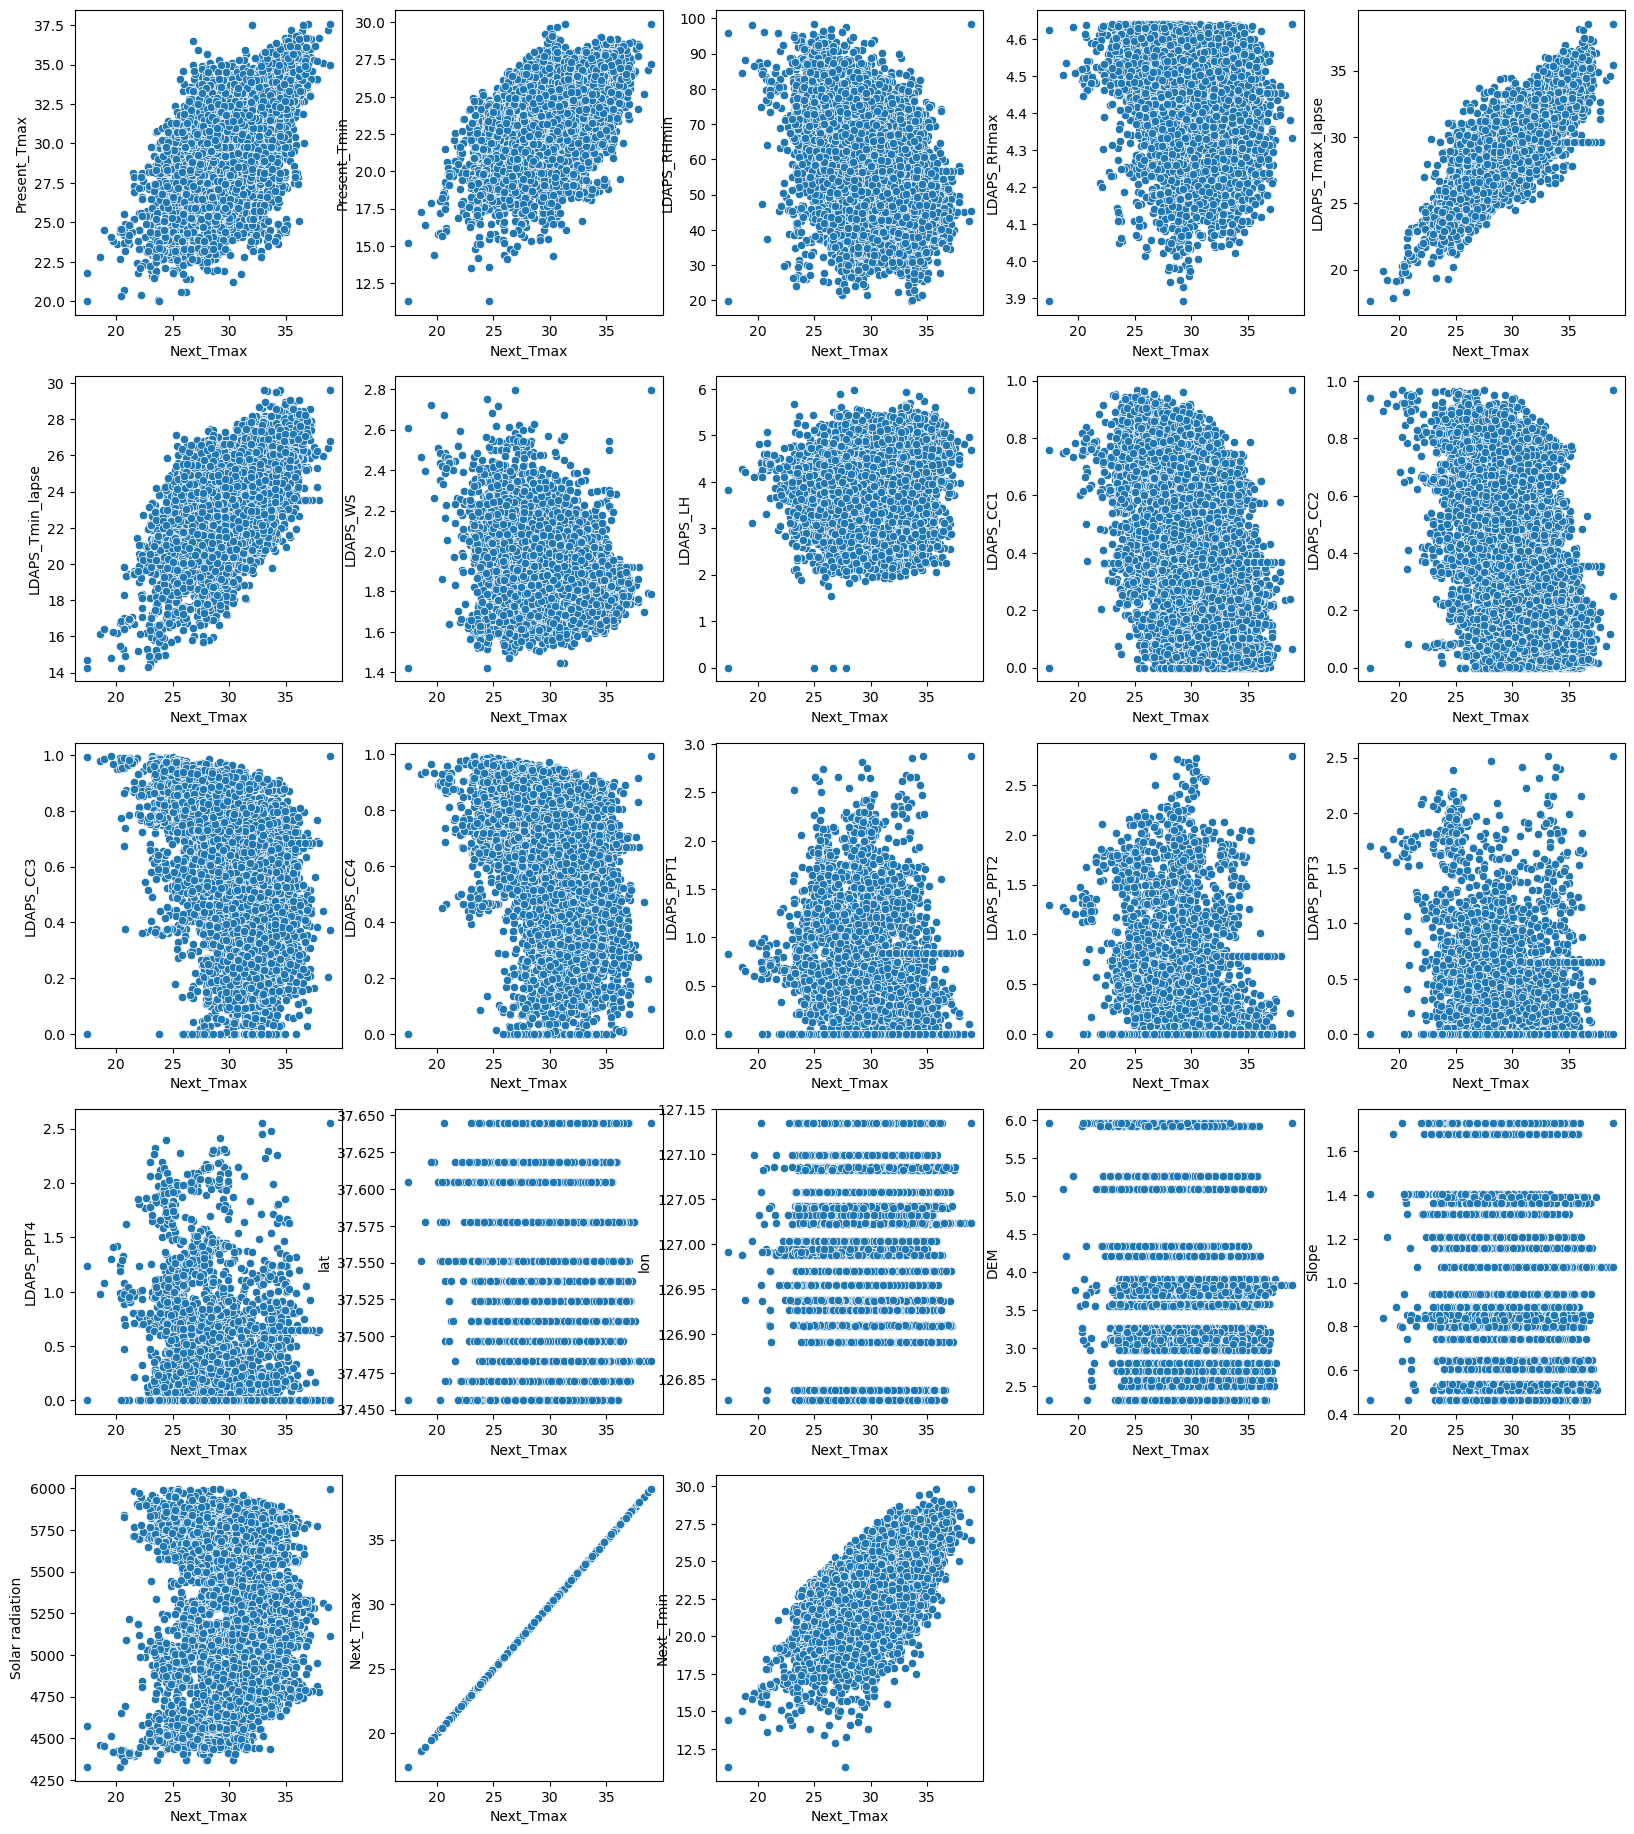

In [55]:
plt.figure(figsize=(20,23))
p=1
for i in df:
    if p<=24:
        plt.subplot(5,5,p)
        sns.scatterplot(x= 'Next_Tmax',y= i,data=df)
        plt.xlabel('Next_Tmax')
        plt.ylabel(i)
    p+=1
plt.show()    

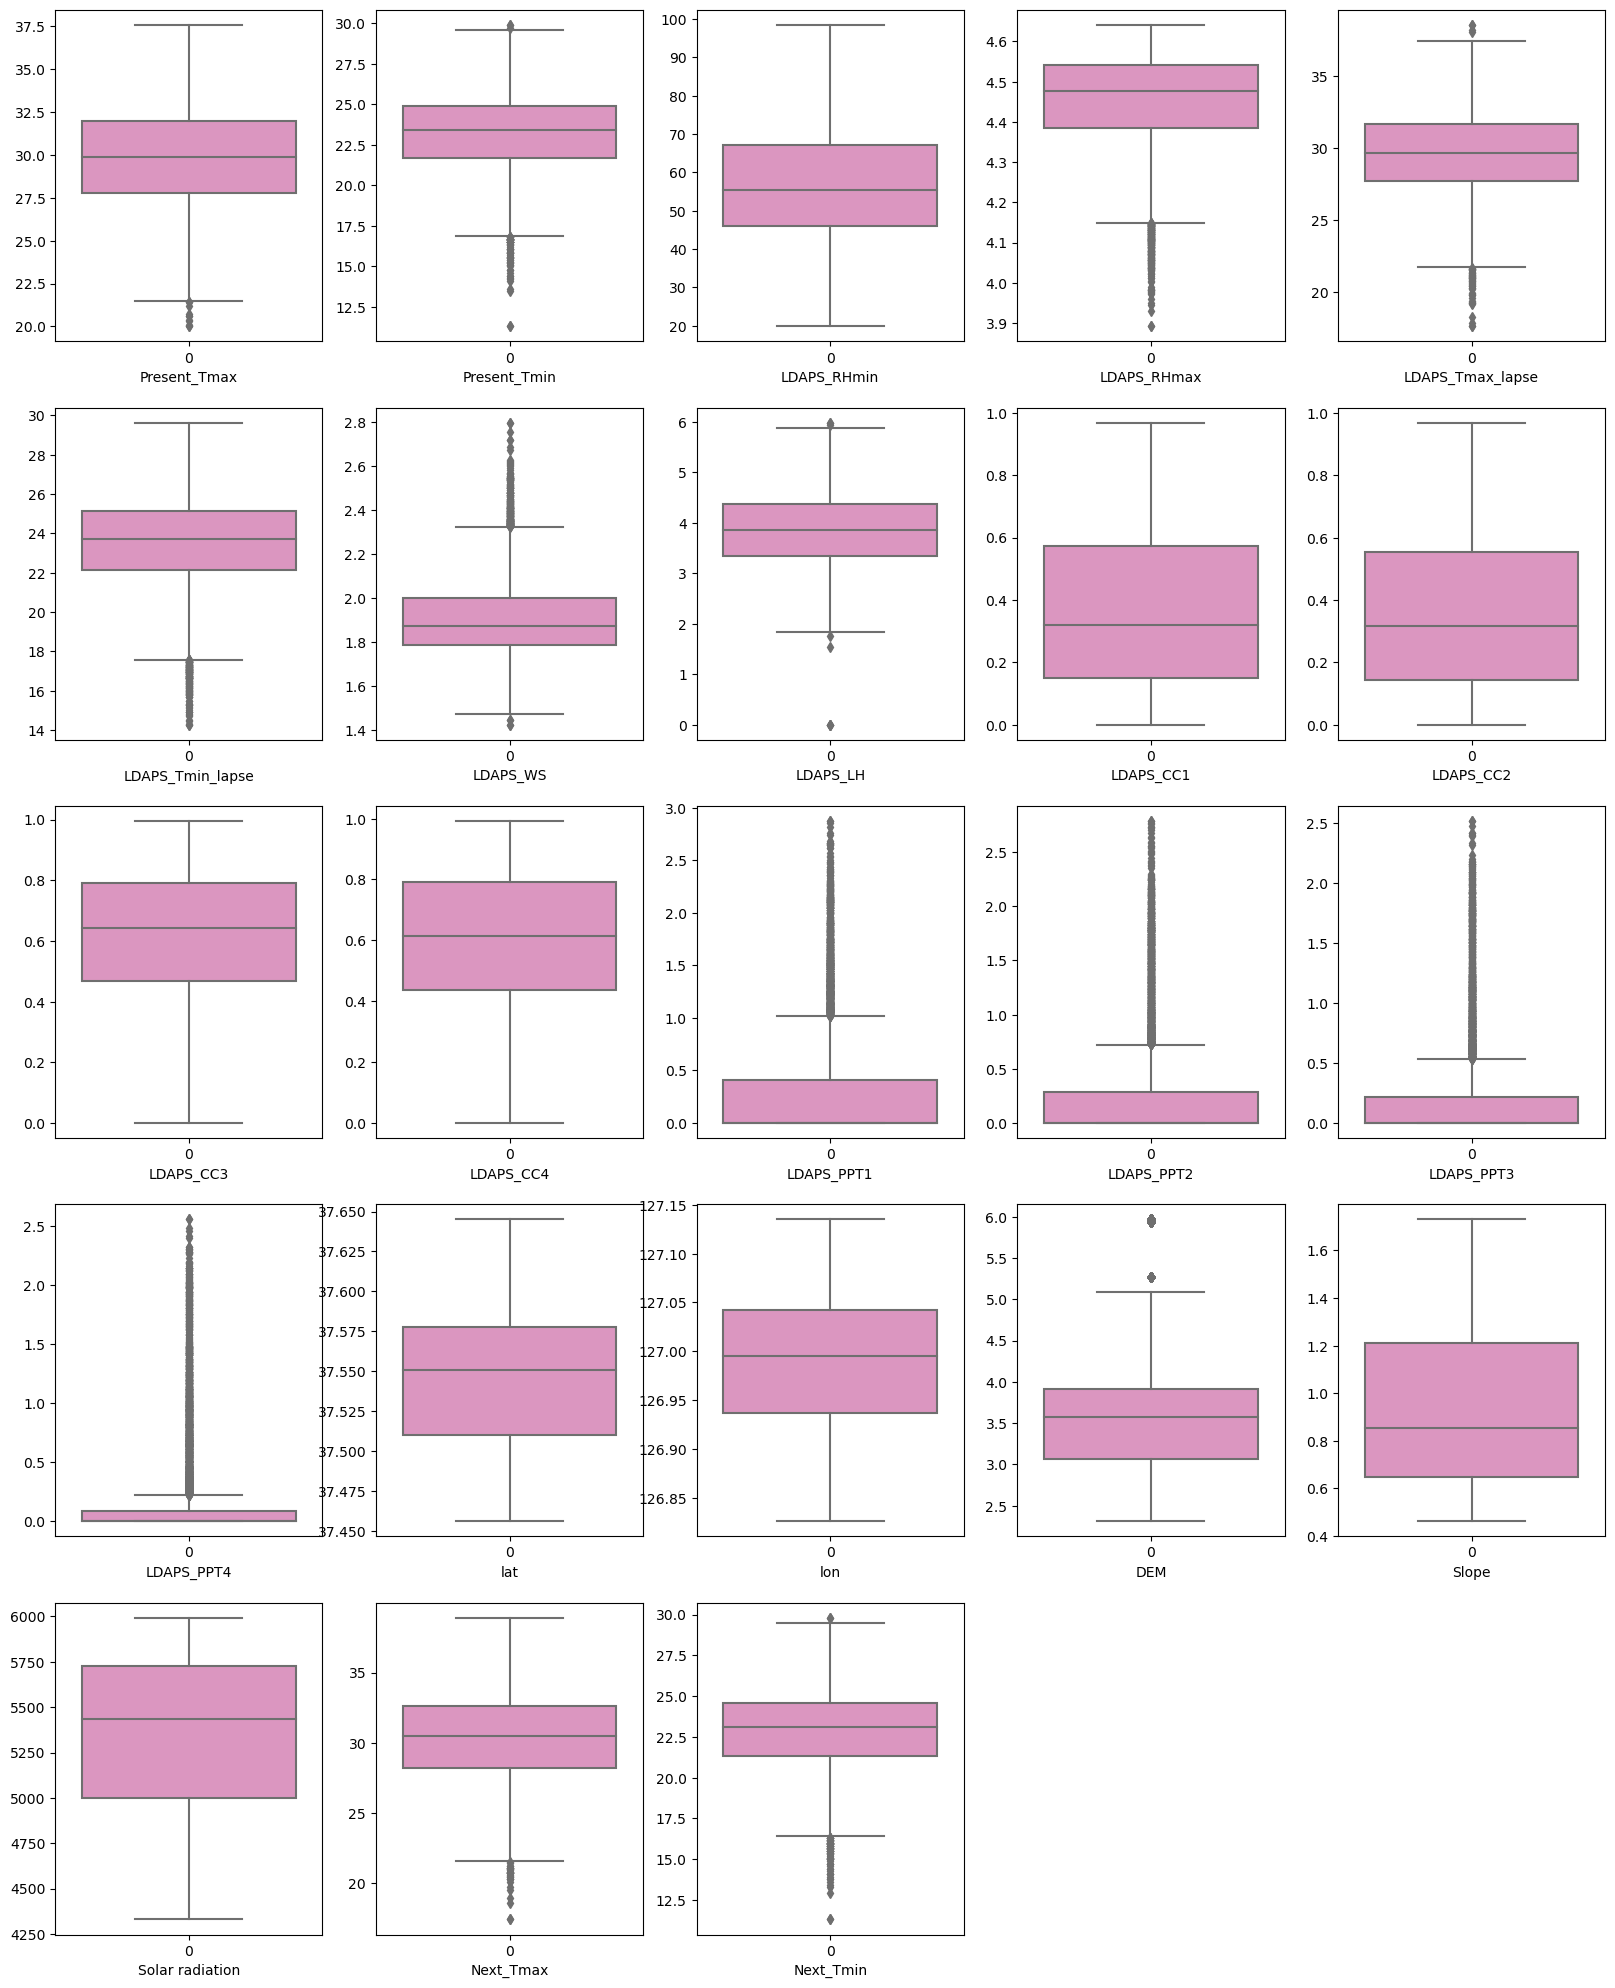

In [58]:
#lets check outlier by plot boxplot
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=25:
        plt.subplot(5,5,p)
        sns.boxplot(df[i], palette= 'Set2_r')
        plt.xlabel(i)
    p+=1
plt.show()

we see that lot of outlier present in two columns spacially terefore its not much helpful for our model even its also possible 
to reduce performance of models hence we drop thiscolumns and traetother columns by specific method

In [14]:
# drop this columns for icrasing performance
df.drop(['LDAPS_PPT3','LDAPS_PPT4'],axis=1,inplace=True)

In [15]:
df.columns

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation',
       'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [16]:
from scipy.stats import zscore

out_features = df[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH',
                    'LDAPS_PPT1','LDAPS_PPT2','DEM','Solar radiation']]
z= np.abs(zscore(out_features))
z

,Present_Tmax,Present_Tmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_PPT1,LDAPS_PPT2,DEM,Solar radiation
Date,,,,,,,,,,,
2013-06-30,0.361326,0.759529,0.396191,0.524889,0.216663,0.044938,0.374986,0.568897,0.519688,2.327694,1.517935
2013-06-30,0.721084,0.676296,0.327952,0.080895,0.223848,0.659198,0.132223,0.568897,0.519688,0.148505,1.229950
2013-06-30,0.619608,0.031188,0.580663,0.162936,0.451210,0.406997,1.456652,0.568897,0.519688,0.490091,1.216534
2013-06-30,0.754909,0.072805,1.097115,0.031092,0.079874,0.683506,0.274963,0.568897,0.519688,0.122836,1.201176
2013-06-30,0.551957,0.551446,0.267776,0.170325,0.011187,0.634273,1.245359,0.568897,0.519688,0.433902,1.207205
...,...,...,...,...,...,...,...,...,...,...,...
2017-08-30,2.187892,2.549048,1.313131,1.112066,2.029679,0.401107,0.442872,0.568897,0.519688,1.227687,2.093040
2017-08-30,2.187892,2.299348,1.545514,0.887662,2.047744,0.188743,0.287289,0.568897,0.519688,1.137368,2.104553
2017-08-30,2.221718,2.424198,1.553126,0.570780,2.137962,0.191392,2.329569,0.568897,0.519688,1.025223,2.074325


In [17]:
#threshold=3
np.where(z>3)

(array([  25,   25,   26,   27,   28,   29,   30,   31,   32,   33,   34,
          35,   36,   37,   38,   39,   40,   41,   42,   43,   44,   44,
          45,   46,   47,   48,   49,  194,  302,  304,  305,  305,  307,
         307,  308,  308,  309,  309,  310,  311,  312,  313,  313,  315,
         315,  317,  317,  320,  321,  321,  322,  323,  323,  324,  324,
         325,  326,  327,  328,  329,  331,  337,  341,  343,  344,  344,
         353,  356,  375,  394,  494,  519,  525,  525,  526,  526,  527,
         528,  528,  529,  530,  531,  531,  532,  532,  533,  533,  534,
         534,  535,  536,  536,  537,  538,  538,  539,  539,  540,  540,
         541,  542,  543,  543,  544,  544,  544,  545,  546,  547,  547,
         548,  548,  549,  549,  553,  554,  569,  575,  594, 1000, 1001,
        1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
        1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1024,
        1225, 1226, 1227, 1229, 1230, 

In [18]:
# now removing data above zscore and creating new dataframe
df1 = df[(z<3).all(axis=1)]
df1.shape

(7185, 21)

In [27]:
df1.columns

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation',
       'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [28]:
df1['Next_Tmax']=df1['Next_Tmax'].fillna(df1['Next_Tmax'].mean())
df1['Next_Tmin']=df1['Next_Tmin'].fillna(df1['Next_Tmin'].mean())

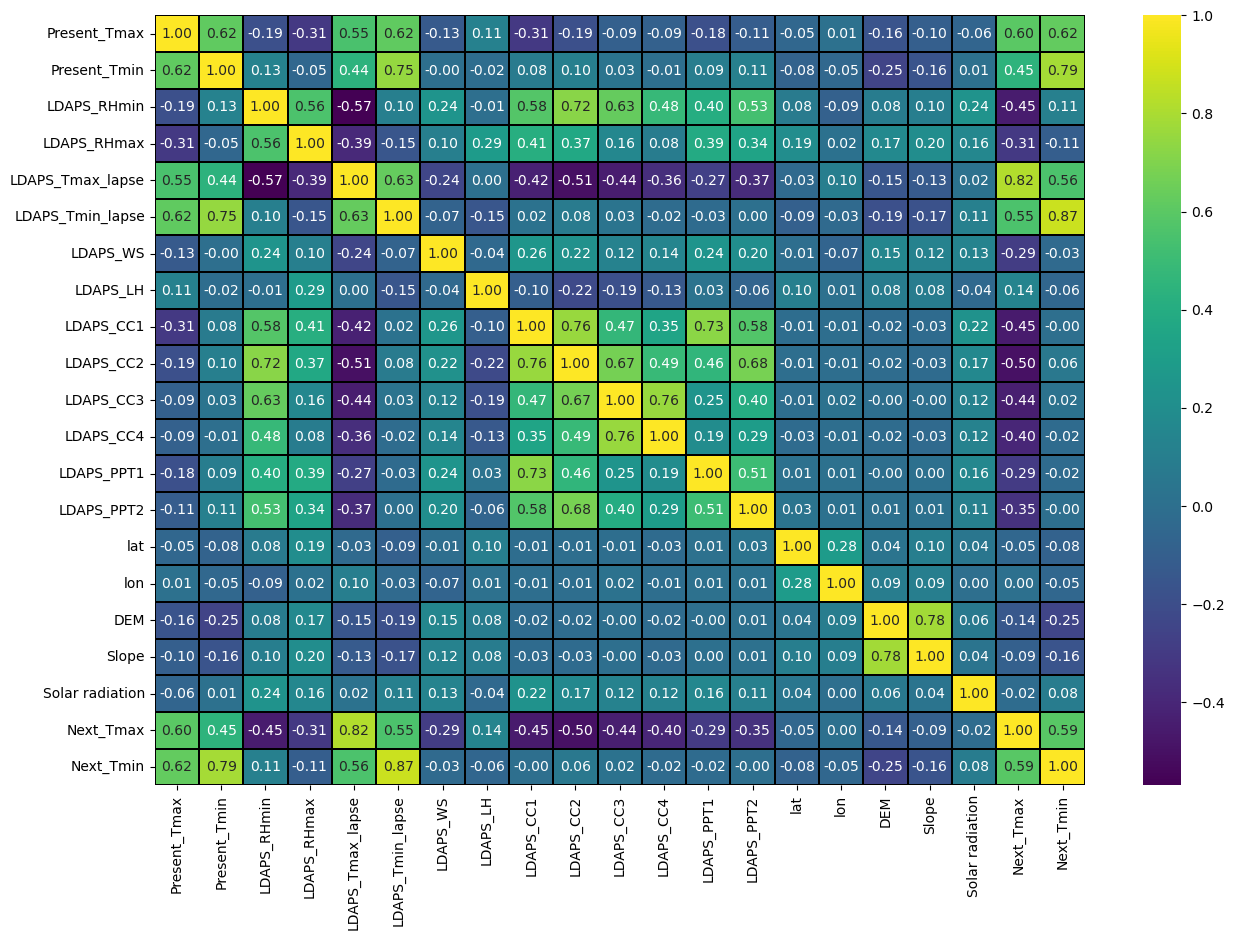

In [68]:
# thenwe checkthe coorelation between target and dependent variables
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(), linewidths = 0.2, fmt = '.2f', linecolor= 'black', annot = True, cmap = 'viridis')
plt.show()

through this we see the all columns are postively and negatively correlated to each other and good relation with target variables
hence we good to go with this columns to build model

In [30]:
#saperating variables into x and y
x=df1.drop(['Next_Tmax','Next_Tmin'],axis=1)
y= df1['Next_Tmax']

In [31]:
#scaling the featuresusing ss
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(x)
x.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,lat,lon,DEM,Slope,Solar radiation
Date,,,,,,,,,,,,,,,,,,,
2013-06-30,28.7,21.4,58.255688,4.499858,28.074101,23.006936,1.896289,4.110499,0.233947,0.203896,0.544796,0.507783,0.0,0.0,37.6046,126.991,5.965871,1.406938,5992.895996
2013-06-30,31.9,21.6,52.263397,4.491419,29.850689,24.035009,1.785468,3.731014,0.225508,0.251771,0.542254,0.503610,0.0,0.0,37.6046,127.032,3.550622,0.801092,5869.312500
2013-06-30,31.6,23.3,48.690479,4.379060,30.091292,24.565633,1.830969,2.740099,0.209344,0.257469,0.588764,0.521864,0.0,0.0,37.5776,127.058,3.217444,0.643203,5863.555664
2013-06-30,32.0,23.4,58.239788,4.586534,29.704629,23.326177,1.781083,4.035663,0.216372,0.226002,0.544189,0.512039,0.0,0.0,37.6450,127.022,3.575659,1.363477,5856.964844
2013-06-30,31.4,21.9,56.174095,4.483978,29.113934,23.486480,1.789965,4.761697,0.151407,0.249995,0.563461,0.553989,0.0,0.0,37.5507,127.135,3.272250,0.796600,5859.552246


In [25]:
#model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge

In [32]:
#then come to model initializing and training
maxacc=0
maxrs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state= i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    pred= lr.predict(x_test)
    acc= r2_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs= i
print('best accuracy is', maxacc, 'at random state', maxrs) 

best accuracy is 0.7738240190653563 at random state 95


In [33]:
# create train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=95)

In [34]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred1= dt.predict(x_test)
print('r2score : ',r2_score(y_test,pred1))
print('mean absolute error :', mean_absolute_error(y_test,pred1))
print('mean squared error :', mean_squared_error(y_test,pred1))
print('root mean squared error :', np.sqrt(mean_squared_error(y_test,pred1)))

r2score :  0.7538431571848299
mean absolute error : 1.0845173090633349
mean squared error : 2.272611272349554
root mean squared error : 1.5075182494250456


In [35]:
lasso= Lasso()
lasso.fit(x_train,y_train)
predls= lasso.predict(x_test)
print('r2 score:\n',r2_score(y_test,predls))
print('mean absolute error :', mean_absolute_error(y_test,predls))
print('mean squared error :', mean_squared_error(y_test,predls))
print('root mean squared error :', np.sqrt(mean_squared_error(y_test,predls)))


r2 score:
 0.7013948015221173
mean absolute error : 1.280153505438109
mean squared error : 2.756833944902995
root mean squared error : 1.6603716285527752


In [36]:
ridge= Ridge()
ridge.fit(x_train,y_train)
predr= ridge.predict(x_test)
print('r2 score:\n',r2_score(y_test,predr))
print('mean absolute error :', mean_absolute_error(y_test,predr))
print('mean squared error :', mean_squared_error(y_test,predr))
print('root mean squared error :', np.sqrt(mean_squared_error(y_test,predr)))

r2 score:
 0.7738149452893923
mean absolute error : 1.0978924675905357
mean squared error : 2.088224317039579
root mean squared error : 1.4450689661879736


In [37]:
rfc= RandomForestRegressor()
rfc.fit(x_train,y_train)
pred2= rfc.predict(x_test)
print('r2score : ',r2_score(y_test,pred2))
print('mean absolute error :', mean_absolute_error(y_test,pred2))
print('mean squared error :', mean_squared_error(y_test,pred2))
print('root mean squared error :', np.sqrt(mean_squared_error(y_test,pred2)))

r2score :  0.8920013849302216
mean absolute error : 0.7422059132075793
mean squared error : 0.9970832709696781
root mean squared error : 0.998540570517632


we see that the accuracy score is higher on randomforest moodel and also the mean error value is very less as compared other
model therefore we selectthis model for future prediction this model predict next day max tempareture

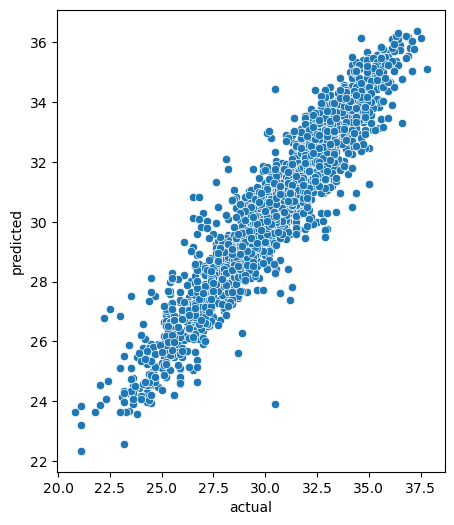

In [44]:
#lets check throgh plot of the performance of model
plt.figure(figsize=(5,6))
sns.scatterplot(x=y_test,y=pred2)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

In [45]:
# again seperate variables for models
x1=df1.drop(['Next_Tmax','Next_Tmin'],axis=1)
y1= df1['Next_Tmin']

print(x1.shape)
print(y1.shape)

(7185, 19)
(7185,)


In [46]:
#scaling the featuresusing ss
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(x1)
x1.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,lat,lon,DEM,Slope,Solar radiation
Date,,,,,,,,,,,,,,,,,,,
2013-06-30,28.7,21.4,58.255688,4.499858,28.074101,23.006936,1.896289,4.110499,0.233947,0.203896,0.544796,0.507783,0.0,0.0,37.6046,126.991,5.965871,1.406938,5992.895996
2013-06-30,31.9,21.6,52.263397,4.491419,29.850689,24.035009,1.785468,3.731014,0.225508,0.251771,0.542254,0.503610,0.0,0.0,37.6046,127.032,3.550622,0.801092,5869.312500
2013-06-30,31.6,23.3,48.690479,4.379060,30.091292,24.565633,1.830969,2.740099,0.209344,0.257469,0.588764,0.521864,0.0,0.0,37.5776,127.058,3.217444,0.643203,5863.555664
2013-06-30,32.0,23.4,58.239788,4.586534,29.704629,23.326177,1.781083,4.035663,0.216372,0.226002,0.544189,0.512039,0.0,0.0,37.6450,127.022,3.575659,1.363477,5856.964844
2013-06-30,31.4,21.9,56.174095,4.483978,29.113934,23.486480,1.789965,4.761697,0.151407,0.249995,0.563461,0.553989,0.0,0.0,37.5507,127.135,3.272250,0.796600,5859.552246


In [47]:
# create train test split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=95)

In [48]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred11= dt.predict(x_test)
print('r2score : ',r2_score(y_test,pred11))
print('mean absolute error :', mean_absolute_error(y_test,pred11))
print('mean squared error :', mean_squared_error(y_test,pred11))
print('root mean squared error :', np.sqrt(mean_squared_error(y_test,pred11)))

r2score :  0.7588849306780758
mean absolute error : 0.8658920450172222
mean squared error : 1.342275603191974
root mean squared error : 1.1585661842087287


In [49]:
lasso= Lasso()
lasso.fit(x_train,y_train)
predls1= lasso.predict(x_test)
print('r2 score:\n',r2_score(y_test,predls1))
print('mean absolute error :', mean_absolute_error(y_test,predls1))
print('mean squared error :', mean_squared_error(y_test,predls1))
print('root mean squared error :', np.sqrt(mean_squared_error(y_test,predls1)))


r2 score:
 0.7631520217890758
mean absolute error : 0.8927332422763701
mean squared error : 1.3185209191276388
root mean squared error : 1.1482686615629805


In [50]:
ridge= Ridge()
ridge.fit(x_train,y_train)
predr1= ridge.predict(x_test)
print('r2 score:\n',r2_score(y_test,predr1))
print('mean absolute error :', mean_absolute_error(y_test,predr1))
print('mean squared error :', mean_squared_error(y_test,predr1))
print('root mean squared error :', np.sqrt(mean_squared_error(y_test,predr1)))

r2 score:
 0.8129360972615112
mean absolute error : 0.7906618759564534
mean squared error : 1.0413754461298557
root mean squared error : 1.0204780478431938


In [52]:
rfc= RandomForestRegressor()
rfc.fit(x_train,y_train)
pred21= rfc.predict(x_test)
print('r2score : ',r2_score(y_test,pred21))
print('mean absolute error :', mean_absolute_error(y_test,pred21))
print('mean squared error :', mean_squared_error(y_test,pred21))
print('root mean squared error :', np.sqrt(mean_squared_error(y_test,pred21)))

r2score :  0.8868275513876374
mean absolute error : 0.5950206713347318
mean squared error : 0.6300253947340447
root mean squared error : 0.7937413903369565


we see that the accuracy score is higher on randomforest moodel and also the mean error value is very less as compared other
model therefore we select this model for future prediction and this model predict next day minimum tempareture prediction

In [53]:
from sklearn.model_selection import GridSearchCV

params= {'max_depth':[10,20,30],'min_samples_split':[5,8,12],'n_estimators':[10,50,100]}

In [54]:
grid_search = GridSearchCV(estimator=rfc,param_grid=params)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [5, 8, 12],
                         'n_estimators': [10, 50, 100]})

In [55]:
grid_search.best_params_

{'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 100}

In [59]:
#now we chck to increase performance of our model with using this criteria and finalize our model
final_model= RandomForestRegressor(max_depth=30,min_samples_split=5,n_estimators=100)
final_model.fit(x_train,y_train)
pred_1= final_model.predict(x_test)
print('r2score :\n ',r2_score(y_test,pred_1))

r2score :
  0.8868786412421785


In [60]:
import pickle

In [61]:
saved_model= pickle.dumps(final_model)

In [66]:
pickle_model= pickle.loads(saved_model)
pickle_model.predict(x_test)

array([23.830137  , 22.31965207, 20.87331825, ..., 23.76456746,
       23.45338016, 24.45828185])